<a href="https://colab.research.google.com/github/qmcnn/Data-Mining/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# จุดประสงค์ เพื่อทำความเข้าใจว่าผู้โดยสารเรือกลุ่มไหนที่มีโอกาสเสียชีวิต

In [160]:
import pandas as pd
import numpy as np
titanic_data = pd.read_csv('/content/drive/MyDrive/Year4/Data Mining/ProjectMining/titanic.csv')
titanic_data

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000      0      0   24160  211.3375       B5        S    2   
1       male   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.5000      1      0    2665   14.4542      NaN        C  NaN   
1305  female      NaN      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

In [161]:
titanic_data[['boat']]

boat
0       2
1      11
2     NaN
3     NaN
4     NaN
...   ...
1304  NaN
1305  NaN
1306  NaN
1307  NaN
1308  NaN

[1309 rows x 1 columns]

In [162]:
titanic_data.shape

(1309, 14)

In [163]:
titanic_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [164]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [165]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# แทนค่า missing

In [166]:
def age_df(df):

    median_age_by_group = df.groupby(['sex', 'pclass'])['age'].median().reset_index()

    for index, row in df.iterrows():
        if pd.isnull(row['age']):
            sex = row['sex']
            pclass = row['pclass']
            median_age = median_age_by_group[(median_age_by_group['sex'] == sex)
            & (median_age_by_group['pclass'] == pclass)]['age'].values[0]
            df.at[index, 'age'] = median_age
    return df
age_df(titanic_data)


pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000      0      0   24160  211.3375       B5        S    2   
1       male   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2     female   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1304  female  14.5000      1      0    2665   14.4542      NaN        C  NaN   
1305  female  22.0000      1      0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000      0      0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000      0      0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000      0      0  315082    7.8750      NaN        S  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 14 columns]

In [167]:
titanic_data[(titanic_data['pclass'] == 1) & (titanic_data['sibsp'] == 0) & (titanic_data['parch'] == 0)]

pclass  survived                                    name     sex   age  \
0         1         1           Allen, Miss. Elisabeth Walton  female  29.0   
5         1         1                     Anderson, Mr. Harry    male  48.0   
7         1         0                  Andrews, Mr. Thomas Jr    male  39.0   
9         1         0                 Artagaveytia, Mr. Ramon    male  71.0   
12        1         1           Aubart, Mme. Leontine Pauline  female  24.0   
..      ...       ...                                     ...     ...   ...   
318       1         0  Williams-Lambert, Mr. Fletcher Fellows    male  42.0   
319       1         1               Wilson, Miss. Helen Alice  female  31.0   
320       1         1                       Woolner, Mr. Hugh    male  42.0   
321       1         0                      Wright, Mr. George    male  62.0   
322       1         1                Young, Miss. Marie Grice  female  36.0   

     sibsp  parch    ticket      fare    cabin embarked boat  body  \
0        0      0     24160  211.3375       B5        S    2   NaN   
5        0      0     19952   26.5500      E12        S    3   NaN   
7        0      0    112050    0.0000      A36        S  NaN   NaN   
9        0      0  PC 17609   49.5042      NaN        C  NaN  22.0   
12       0      0  PC 17477   69.3000      B35        C    9   NaN   
..     ...    ...       ...       ...      ...      ...  ...   ...   
318      0      0    113510   35.0000     C128        S  NaN   NaN   
319      0      0     16966  134.5000  E39 E41        C    3   NaN   
320      0      0     19947   35.5000      C52        S    D   NaN   
321      0      0    113807   26.5500      NaN        S  NaN   NaN   
322      0      0  PC 17760  135.6333      C32        C    8   NaN   

                         home.dest  
0                     St Louis, MO  
5                     New York, NY  
7                      Belfast, NI  
9              Montevideo, Uruguay  
12                   Paris, France  
..                             ...  
318                London, England  
319                            NaN  
320                London, England  
321                    Halifax, NS  
322  New York, NY / Washington, DC  

[160 rows x 14 columns]

In [168]:
titanic_data[titanic_data['fare'].isnull()]

pclass  survived                name   sex   age  sibsp  parch ticket  \
1225       3         0  Storey, Mr. Thomas  male  60.5      0      0   3701   

      fare cabin embarked boat   body home.dest  
1225   NaN   NaN        S  NaN  261.0       NaN

In [169]:
median_fare = titanic_data.groupby(['pclass', 'parch', 'sibsp'])['fare'].median()[3][0][0]
median_fare

7.8542

In [170]:
titanic_data.loc[(titanic_data['pclass'] == 3) & (titanic_data['parch'] == 0) & (titanic_data['sibsp'] == 0), 'fare'] = median_fare

In [171]:
titanic_data[titanic_data['fare'].isnull()]

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest]
Index: []

In [172]:
import random

def cabin_df(df):
    # แทนค่าแรกของ 'cabin' ในแต่ละแถวด้วยตัวอักษรแรก ของ 'cabin' ถ้า 'cabin' ไม่มีค่าว่าง (NaN).
    df['Cabin'] = df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Z')
    # Drop คอลัมน์ 'cabin' ออกจาก DataFrame เนื่องจากเราได้สร้างคอลัมน์ใหม่ 'Cabin' แล้ว.
    df.drop('cabin', axis=1, inplace=True)
    #แทนค่าในคอลัมน์ 'Cabin' โดยรวมกลุ่ม 'cabin' ด้วยตัวอักษร
    #'A', 'B', 'C', 'T' ให้เป็น '1',
    #'D', 'E' ให้เป็น '2',
    #'F', 'G' ให้เป็น '3'.
    df['Cabin'] = df['Cabin'].replace(['A', 'B', 'C', 'T'], '1')
    df['Cabin'] = df['Cabin'].replace(['D', 'E'], '2')
    df['Cabin'] = df['Cabin'].replace(['F', 'G'], '3')

    #นำข้อมูลมาเติมในกรณีที่ 'Cabin' เป็นค่าว่าง ('Z') และ 'pclass' เท่ากับ 1
    #จะถูกกำหนดค่าจากกลุ่ม 'ABC' หรือ 'DE' แบบสุ่ม.
    mask = (df['Cabin'] == 'Z') & (df['pclass'] == 1)
    df.loc[mask, 'Cabin'] = random.choice(['1', '2'])

    #ในกรณีที่ 'Cabin' เป็นค่าว่าง ('Z') และ 'pclass' เท่ากับ 3
    #จะถูกกำหนดค่าเป็น 'FG'.
    mask = (df['Cabin'] == 'Z') & (df['pclass'] == 3)
    df.loc[mask, 'Cabin'] = '3'

    #ในกรณีที่ 'Cabin' เป็นค่าว่าง ('Z') และ 'pclass' เท่ากับ 2
    #จะถูกกำหนดค่าจากกลุ่ม 'DE' หรือ 'FG' แบบสุ่ม.two deck groups
    mask = (df['Cabin'] == 'Z') & (df['pclass'] == 2)
    df.loc[mask, 'Cabin'] = random.choice(['2', '3'])

cabin_df(titanic_data)

In [173]:
titanic_data

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare embarked boat   body  \
0     female  29.0000      0      0   24160  211.3375        S    2    NaN   
1       male   0.9167      1      2  113781  151.5500        S   11    NaN   
2     female   2.0000      1      2  113781  151.5500        S  NaN    NaN   
3       male  30.0000      1      2  113781  151.5500        S  NaN  135.0   
4     female  25.0000      1      2  113781  151.5500        S  NaN    NaN   
...      ...      ...    ...    ...     ...       ...      ...  ...    ...   
1304  female  14.5000      1      0    2665   14.4542        C  NaN  328.0   
1305  female  22.0000      1      0    2665   14.4542        C  NaN    NaN   
1306    male  26.5000      0      0    2656    7.8542        C  NaN  304.0   
1307    male  27.0000      0      0    2670    7.8542        C  NaN    NaN   
1308    male  29.0000      0      0  315082    7.8542        S  NaN    NaN   

                            home.dest Cabin  
0                        St Louis, MO     1  
1     Montreal, PQ / Chesterville, ON     1  
2     Montreal, PQ / Chesterville, ON     1  
3     Montreal, PQ / Chesterville, ON     1  
4     Montreal, PQ / Chesterville, ON     1  
...                               ...   ...  
1304                              NaN     3  
1305                              NaN     3  
1306                              NaN     3  
1307                              NaN     3  
1308                              NaN     3  

[1309 rows x 14 columns]

In [174]:
titanic_data['Cabin']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: Cabin, Length: 1309, dtype: object

In [175]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        2
boat          823
body         1188
home.dest     564
Cabin           0
dtype: int64

In [176]:
titanic = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'Cabin', 'survived']]
titanic

pclass     sex      age  sibsp  parch  ticket      fare Cabin  survived
0          1  female  29.0000      0      0   24160  211.3375     1         1
1          1    male   0.9167      1      2  113781  151.5500     1         1
2          1  female   2.0000      1      2  113781  151.5500     1         0
3          1    male  30.0000      1      2  113781  151.5500     1         0
4          1  female  25.0000      1      2  113781  151.5500     1         0
...      ...     ...      ...    ...    ...     ...       ...   ...       ...
1304       3  female  14.5000      1      0    2665   14.4542     3         0
1305       3  female  22.0000      1      0    2665   14.4542     3         0
1306       3    male  26.5000      0      0    2656    7.8542     3         0
1307       3    male  27.0000      0      0    2670    7.8542     3         0
1308       3    male  29.0000      0      0  315082    7.8542     3         0

[1309 rows x 9 columns]

In [177]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        2
boat          823
body         1188
home.dest     564
Cabin           0
dtype: int64

# decision tree

In [178]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# 1. โหลดและจัดรูปแบบข้อมูล

# 2. แบ่งข้อมูล
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','Cabin']]  # ตัวแปรอิสระ
y = titanic['survived']  # ตัวแปรตาม

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder
label_encoder = LabelEncoder()

# ใช้ LabelEncoder ในการแปลงคอลัมน์ 'Sex' เป็นตัวเลข
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_test['sex'] = label_encoder.transform(X_test['sex'])

# 3. สร้างโมเดล Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# 4. ปรับพารามิเตอร์และความซับซ้อนของโมเดล (ถ้าต้องการ)

# 5. สร้างโมเดลและฝึก
decision_tree.fit(X_train, y_train)

# 6. ทดสอบโมเดล
y_pred = decision_tree.predict(X_test)

# คำนวณความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
print("ความแม่นยำของ Decision Tree Model:", accuracy)


ความแม่นยำของ Decision Tree Model: 0.7557251908396947


In [179]:
from sklearn.metrics import accuracy_score, classification_report
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       144
           1       0.78      0.64      0.70       118

    accuracy                           0.76       262
   macro avg       0.76      0.75      0.75       262
weighted avg       0.76      0.76      0.75       262



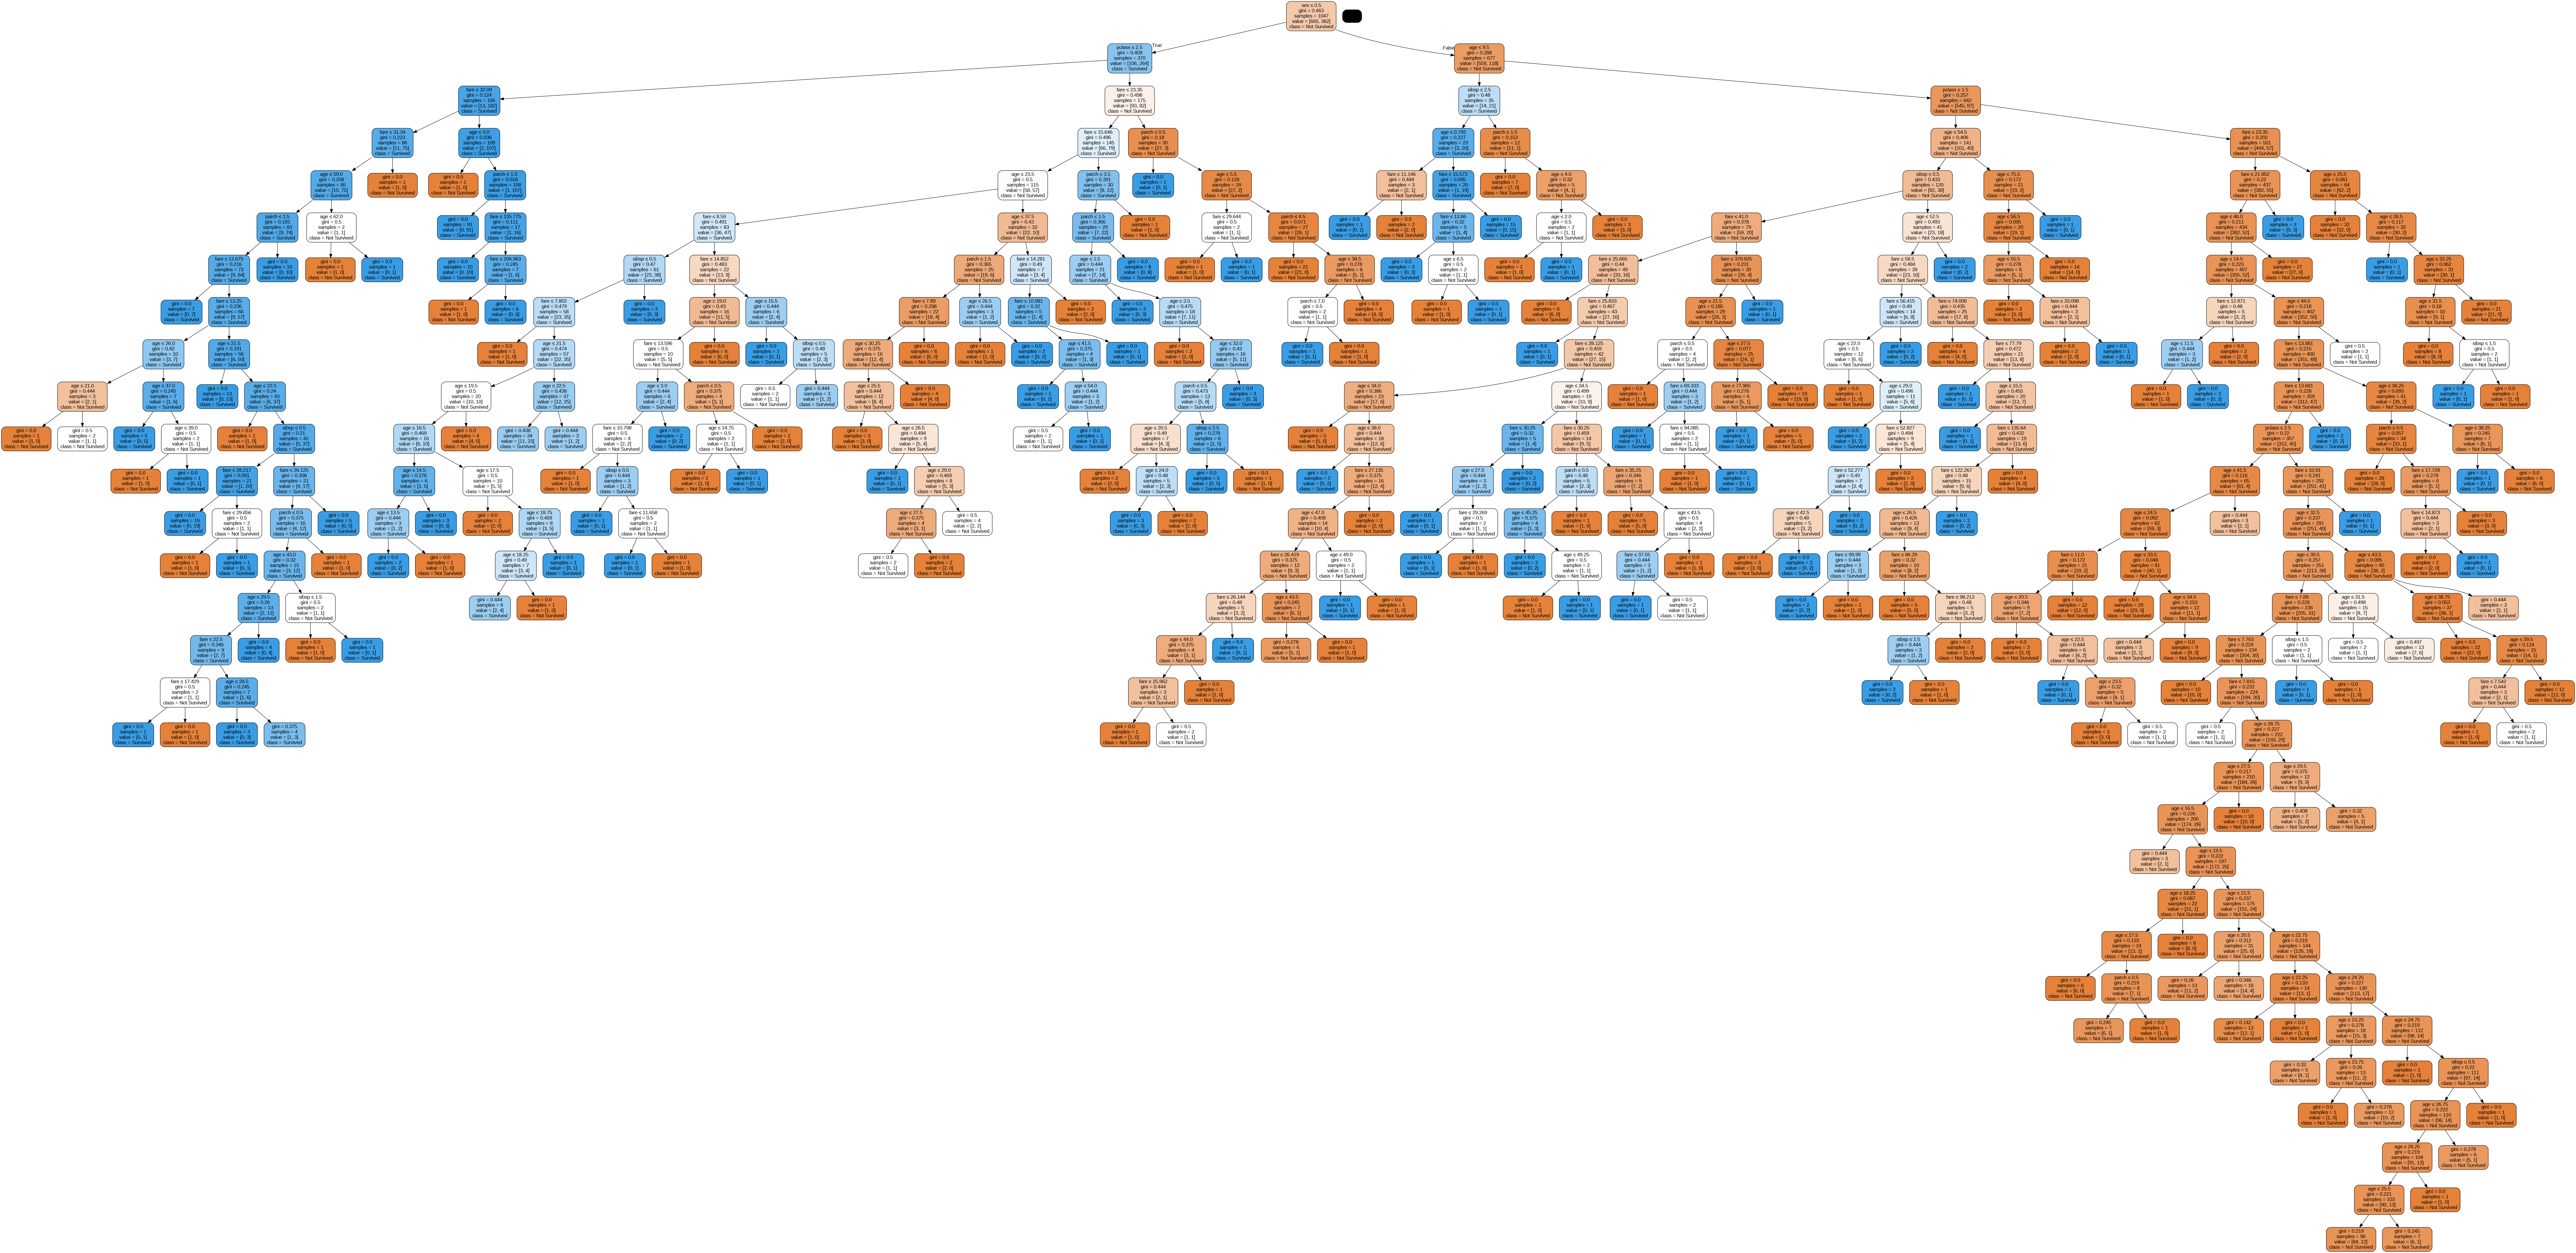

In [180]:
from graphviz import Graph
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create a Decision Tree Model (make sure you have already created and trained the model)
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Create a StringIO object to store the DOT data
dot_data = StringIO()

# Export the Decision Tree to DOT format
export_graphviz(model, out_file=dot_data, feature_names=X.columns, class_names=['Not Survived', 'Survived'],
                filled=True, rounded=True, special_characters=True)

# Create a Pydotplus graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the Decision Tree graph
Image(graph.create_png())


# Naive Bayes

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [225]:
# 2. แบ่งข้อมูล
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','Cabin' ]]  # ตัวแปรอิสระ
y = titanic['survived']  # ตัวแปรตาม

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
# 3. สร้าง Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes

GaussianNB()

In [227]:
# สร้าง LabelEncoder
label_encoder = LabelEncoder()

# ใช้ LabelEncoder ในการแปลงคอลัมน์ 'Sex' เป็นตัวเลข
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_test['sex'] = label_encoder.transform(X_test['sex'])
# 4. ปรับพารามิเตอร์และความซับซ้อนของโมเดล (ถ้าต้องการ)

# 5. สร้างโมเดลและฝึก
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [228]:
# 6. ทดสอบโมเดล
y_pred = naive_bayes.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [229]:
# คำนวณความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
print("ความแม่นยำของ Naive Bayes Classifier:", accuracy)


ความแม่นยำของ Naive Bayes Classifier: 0.7557251908396947


In [230]:
# 7. คำนวณ confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[119,  25],
       [ 39,  79]])

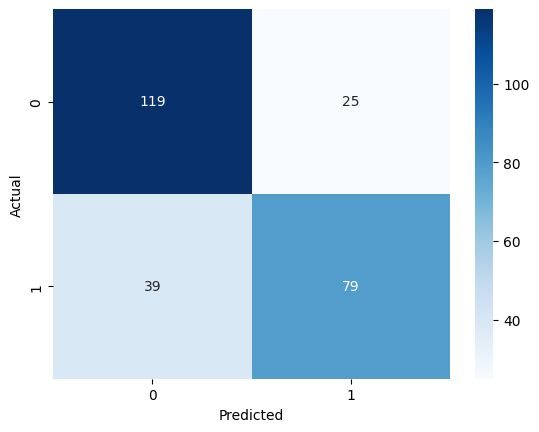

In [231]:
# 8. พล็อต confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Support Vector Machine (SVM)

In [232]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [233]:
# 2. แบ่งข้อมูล
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','Cabin']]  # ตัวแปรอิสระ
y = titanic['survived']  # ตัวแปรตาม

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder
label_encoder = LabelEncoder()

# ใช้ LabelEncoder ในการแปลงคอลัมน์ 'Sex' เป็นตัวเลข
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_test['sex'] = label_encoder.transform(X_test['sex'])

In [217]:
# 3. สร้าง Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1)

# 5. สร้างโมเดลและฝึก
svm_classifier.fit(X_train, y_train)

# 6. ทดสอบโมเดล
y_pred = svm_classifier.predict(X_test)


In [218]:
# คำนวณความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
print("ความแม่นยำของ SVM Classifier:", accuracy)

ความแม่นยำของ SVM Classifier: 0.7557251908396947


In [219]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7557251908396947
Precision: 0.78125
Recall: 0.635593220338983


# Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [221]:
# 2. แบ่งข้อมูล
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','Cabin']]  # ตัวแปรอิสระ
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง LabelEncoder
label_encoder = LabelEncoder()

# ใช้ LabelEncoder ในการแปลงคอลัมน์ 'Sex' เป็นตัวเลข
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_test['sex'] = label_encoder.transform(X_test['sex'])

In [222]:
# 3. สร้าง Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. สร้างโมเดลและฝึก
random_forest_classifier.fit(X_train, y_train)

# 6. ทดสอบโมเดล
y_pred = random_forest_classifier.predict(X_test)


In [223]:
# คำนวณความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
print("ความแม่นยำของ Random Forest Classifier:", accuracy)


ความแม่นยำของ Random Forest Classifier: 0.7824427480916031


In [224]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 100))  # ปรับขนาดของกราฟตามต้องการ
plot_tree(decision_tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()
